#Import required labraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (40,10)
from collections import Counter
# make it easier to understand by importing the required libraries within keras
#from tensorflow.keras.layers import Dense, Flatten
import tensorflow as tfa
!pip install tensorflow-addons
import tensorflow_addons as tfaA
from statistics import mean
import os
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.datasets import make_classification, make_circles
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 31.5 MB/s 


In [2]:
!pip install tensorflow-addons
from tensorflow_addons.optimizers import AdamW

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Functions

In [3]:
def plot_tsne(X, y, target_names,title):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(X)
    target_ids = range(len(target_names))
    print(X_2d[0])
    print(X_2d[1])
    print(X_2d[2])
 
    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
    
    plt.title(title)
    plt.legend()
    plt.show()

def getConfusionMatrix(model,X_test,y_test,title):
    """plot the confusion matrix of a model
    Input: model, X_test, y_test
    Output: print the confusion matrix
    """
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(title)
    plt.show()
# create function that build the model 
def build_compile_fit_MLP(BS=1,HL=1,LR=0.001,AF='relu',op="adamW",NN=10):
  """
  this function used to build the network and compile and fit  the model and 
  input : 
    BS : Batch size 
    HL : Hidden Layers 
    LR : Learning rate 
    AF : Activation function 
  output : return a model 
  """

  model = tfa.keras.Sequential()
  # add the input layer
  input =  tfa.keras.layers.Input(shape=(X_trainSet.shape[1],))
  model.add(input)
  # add the hidden layers 
  for h in range(HL):
      model.add(tfa.keras.layers.Dense(NN, activation=AF)) 
    
  # add the output layer 
  model.add(tfa.keras.layers.Dense(6, activation='softmax'))

  if(op == "adamW"):
    optimizer=AdamW(learning_rate=LR, weight_decay=.00001)
  elif(op=="SGD_1"):
    optimizer=tfa.keras.optimizers.SGD(learning_rate=LR,momentum=0.1,nesterov=False,name='SGD')
  elif(op=="SGD_5"):
    optimizer=tfa.keras.optimizers.SGD(learning_rate=LR,momentum=0.5,nesterov=False,name='SGD')
  elif(op=="SGD_9"):
    optimizer=tfa.keras.optimizers.SGD(learning_rate=LR,momentum=0.9,nesterov=False,name='SGD')
  elif(op=="Rprop"):
    optimizer=tfa.keras.optimizers.RMSprop(learning_rate=LR,rho=0.9,momentum=0.1,epsilon=1e-07,centered=False,name='RMSprop')
  else : 
    optimizer = op

  # compile the model 
  model.compile(
    loss=tfa.keras.losses.categorical_crossentropy,
    optimizer = optimizer,metrics=['accuracy'])

  # fit the model 
  history = model.fit(x= X_trainSet,y = y_trainSet, validation_data= (X_testSet, y_testSet),epochs=500, batch_size=BS, verbose=2)

  return model,history

def get_accuracies(model,model_history):
  training_Acc = model_history.history['accuracy'][-1]*100
  testing_Acc = model.evaluate(X_testSet, y_testSet)[1]*100
  val_acc = model.evaluate(X_valSet,y_valSet)[1]*100
  return training_Acc,testing_Acc , val_acc

def plot_n_Epoch_VS_Accuracy(model_history):
  plt.title("numer of epochs versus training and testing losses")
  plt.plot(np.log10(model_history.history['loss']))
  plt.plot(np.log10(model_history.history['val_loss']), 'r')
  plt.legend(['train loss', 'test loss'])
  plt.xlabel("# of epochs")
  plt.grid()

def build_5_time_testingBased(BS=1,HL=1,LR=0.001,AF='relu',op="adamW",NN=10):
  # build and compile the model 

  # to collect the accuracies to calculate the max and the min 
  train_accs = []
  test_accs = []
  val_accs = []

  # to collect the training and testing loss 
  total_training_loss = []
  total_testing_loss = []

  total_y_pred=[]
  total_y_pred_result=[]

  # build model
  for i in range(5):
    print(f"run {i+1}:")
    # build the model
    model ,model_history = build_compile_fit_MLP(BS,HL,LR,AF,op,NN)

    # get the training , validation and testing accuracies 
    train_acc,test_acc,val_acc= get_accuracies(model,model_history)

    y_pred=model.predict(X_testSet)
    #print(y_pred)

    # result=np.where(y_pred == np.amax(y_pred), 1, 0)
    result = np.array
    total_y_pred.append(y_pred)
    total_y_pred_result.append(result)
    #print(result)

    train_accs.append(train_acc)
    test_accs.append(test_acc)
    val_accs.append(val_acc)
    
    total_training_loss.append(list(model_history.history['loss']))
    total_testing_loss.append(list(model_history.history['val_loss']))
    print("===========================================================================")

  #find the minimum , maximum , average 

  max_train_acc = np.max(train_accs)
  min_train_acc = np.min(train_accs)
  avg_train_acc = np.average(train_accs)
  
  max_test_acc = np.max(test_accs)
  min_test_acc = np.min(test_accs)
  avg_test_acc = np.average(test_accs)

  avg_val_acc = np.average(val_accs)

  print(f"min training   accuracy {min_train_acc}%")
  print(f"max training   accuracy {max_train_acc}%")
  print(f"avg training   accuracy {avg_train_acc}%")

  print(f"min testing    accuracy {min_test_acc}%")
  print(f"max testing    accuracy {max_test_acc}%")
  print(f"avg testing    accuracy {avg_test_acc}%")

  print(f"avg validation    accuracy {avg_val_acc}%")

  return   max_train_acc,min_train_acc,avg_train_acc ,max_test_acc ,min_test_acc , avg_test_acc , total_training_loss ,total_testing_loss ,total_y_pred,total_y_pred_result ,avg_val_acc


def plot_trLoss_VS_tsLoss_5_times(total_training_loss,total_testing_loss):
  for i in range(5):
    f=plt.subplot(2,5,i+1)
    f.figure.set_size_inches(30,10)
    plt.plot(np.log10(total_training_loss[i]))
    plt.plot(np.log10(total_testing_loss[i]),'r')
    plt.legend(['train loss', 'testing loss']) 
    plt.title("run # %d"%(i+1))
    plt.xlabel("# of epochs")
    plt.ylabel("loss")
    plt.grid()


In [4]:
def draw_df(val0,val1,val2,val3,val4,val5):

  col=['Max training acc ()%',
  'Max test acc ()%',
  'Min training acc ()%',
  'Min test acc ()%',
  'Avg training acc ()%',
  'Avg test acc ()%',]
 
  draw_df=pd.DataFrame(data=[val0],columns=['Max training acc ()%'])
  draw_df[col[1]]=val1
  draw_df[col[2]]=val2
  draw_df[col[3]]=val3
  draw_df[col[4]]=val4
  draw_df[col[5]]=val5
  draw_df=draw_df.style.set_table_styles(
    [{"selector": "", "props": [("border", "1px solid grey")]},
      {"selector": "tbody td", "props": [("border", "1px solid grey")]},
     {"selector": "th", "props": [("border", "1px solid grey")]}
    ])

  return draw_df

In [5]:
def plot_avg_confusion_matrix(total_y_pred):

  total_confusion_matrices=[]
  cm_sm = np.zeros((6,6))  
  labels=[0,1,2,3,4,5]
  for index,item in enumerate(total_y_pred):
    pred=np.argmax(item,axis=1)
    cm=confusion_matrix(y_testSet_copy, pred)
    total_confusion_matrices.append(cm)
    cm_sm = cm_sm + cm
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    plt.title("confusion matrix number "+str(index+1))
    plt.show()   

  disp = ConfusionMatrixDisplay(confusion_matrix=cm_sm/10,display_labels=labels)
  disp.plot()
  plt.title("the average confusion matrix")
  plt.show()

# Read DataSet

In [6]:

#'train.csv'
linkTrainSet = 'https://drive.google.com/uc?id=1vk6qb8Z92kNN99Ty4oC-2QqDynX_ZgQW'
#'test.csv'
linkTestSet = 'https://drive.google.com/uc?id=1K_lJHRglkwGlBaznbXWFuQ3WVt32h89c'
# 'val.csv'
linkvalSet = 'https://drive.google.com/uc?id=1iHkCJsxAaahzFCdHTRYEyqL8PHb1wAXM'
#read dataSet
trainSet = pd.read_csv(linkTrainSet)
testSet = pd.read_csv(linkTestSet)
valSet = pd.read_csv(linkvalSet)
trainSet.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,1,0,0,0,0,0,4,819,757,TCP-SYN
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,2,0,0,0,0,0,5,1018,918,TCP-SYN
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,2,0,0,0,0,0,8,987400,987276,Normal
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,3,0,0,0,0,0,8,195879,195780,PortScan
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,1,0,0,0,0,0,4,4524,4411,Overflow


# 2. Briefly study the dataset and provide your insights and any relevant information. That includes, but not limited to:

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

## Number of instances per class

### Train Set

In [8]:
Counter(trainSet["Label"])

Counter({'Blackhole': 561,
         'Diversion': 414,
         'Normal': 254,
         'Overflow': 73,
         'PortScan': 666,
         'TCP-SYN': 651})

In [9]:
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      2619 non-null   object
 1   Port Number                    2619 non-null   object
 2   Received Packets               2619 non-null   int64 
 3   Received Bytes                 2619 non-null   int64 
 4   Sent Bytes                     2619 non-null   int64 
 5   Sent Packets                   2619 non-null   int64 
 6   Port alive Duration (S)        2619 non-null   int64 
 7   Delta Received Packets         2619 non-null   int64 
 8   Delta Received Bytes           2619 non-null   int64 
 9   Delta Sent Bytes               2619 non-null   int64 
 10  Delta Sent Packets             2619 non-null   int64 
 11  Delta Port alive Duration (S)  2619 non-null   int64 
 12  Connection Point               2619 non-null   int64 
 13  Tot

### test set

In [10]:
Counter(testSet["Label"])

Counter({'Blackhole': 122,
         'Diversion': 90,
         'Normal': 49,
         'Overflow': 17,
         'PortScan': 127,
         'TCP-SYN': 156})

In [11]:
testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      561 non-null    object
 1   Port Number                    561 non-null    object
 2   Received Packets               561 non-null    int64 
 3   Received Bytes                 561 non-null    int64 
 4   Sent Bytes                     561 non-null    int64 
 5   Sent Packets                   561 non-null    int64 
 6   Port alive Duration (S)        561 non-null    int64 
 7   Delta Received Packets         561 non-null    int64 
 8   Delta Received Bytes           561 non-null    int64 
 9   Delta Sent Bytes               561 non-null    int64 
 10  Delta Sent Packets             561 non-null    int64 
 11  Delta Port alive Duration (S)  561 non-null    int64 
 12  Connection Point               561 non-null    int64 
 13  Total

### Validation Set

In [12]:
Counter(valSet["Label"])

Counter({'Blackhole': 143,
         'Diversion': 92,
         'Normal': 47,
         'Overflow': 15,
         'PortScan': 141,
         'TCP-SYN': 123})

In [13]:
valSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      561 non-null    object
 1   Port Number                    561 non-null    object
 2   Received Packets               561 non-null    int64 
 3   Received Bytes                 561 non-null    int64 
 4   Sent Bytes                     561 non-null    int64 
 5   Sent Packets                   561 non-null    int64 
 6   Port alive Duration (S)        561 non-null    int64 
 7   Delta Received Packets         561 non-null    int64 
 8   Delta Received Bytes           561 non-null    int64 
 9   Delta Sent Bytes               561 non-null    int64 
 10  Delta Sent Packets             561 non-null    int64 
 11  Delta Port alive Duration (S)  561 non-null    int64 
 12  Connection Point               561 non-null    int64 
 13  Total

## Number of null values per feature

### Train Set

In [14]:
trainSet.isna().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

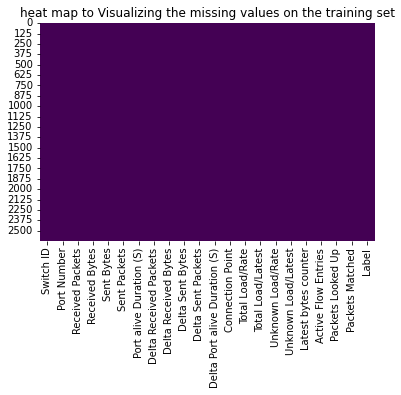

In [15]:
plt.title("heat map to Visualizing the missing values on the training set")
sns.heatmap(trainSet.isnull(),cbar=False,cmap='viridis')

### Test Set

In [16]:
testSet.isna().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

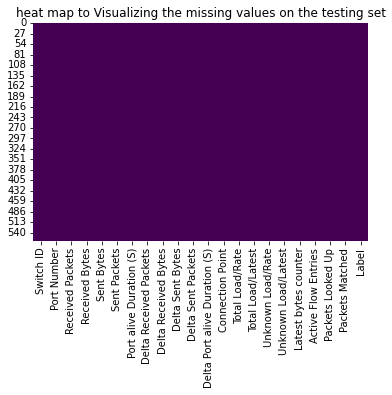

In [17]:
plt.title("heat map to Visualizing the missing values on the testing set")
sns.heatmap(testSet.isnull(),cbar=False,cmap='viridis')

### Validation Set

In [18]:
valSet.isna().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

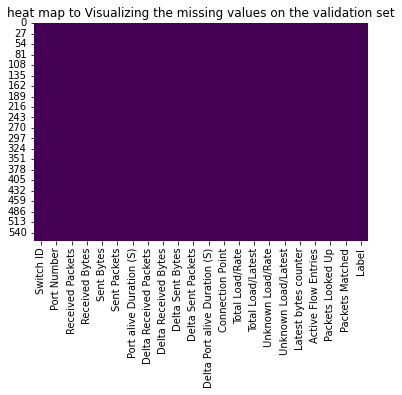

In [19]:
plt.title("heat map to Visualizing the missing values on the validation set")
sns.heatmap(valSet.isnull(),cbar=False,cmap='viridis')


## Number of possible outliers

### Train Set

In [20]:
# calculate IQR for Training Set
IQR1_train = trainSet.quantile(0.25)
IQR3_train = trainSet.quantile(0.75)
IQR_train = IQR3_train - IQR1_train
print("Number of possible outliers per feature")
print(((trainSet < (IQR1_train - 1.5 * IQR_train)) | (trainSet > (IQR3_train + 1.5 * IQR_train))).sum())

Number of possible outliers per feature
Active Flow Entries              152
Connection Point                   0
Delta Port alive Duration (S)    441
Delta Received Bytes             648
Delta Received Packets           649
Delta Sent Bytes                 604
Delta Sent Packets               604
Label                              0
Latest bytes counter             396
Packets Looked Up                536
Packets Matched                  536
Port Number                        0
Port alive Duration (S)            0
Received Bytes                   186
Received Packets                 312
Sent Bytes                       222
Sent Packets                     379
Switch ID                          0
Total Load/Latest                501
Total Load/Rate                  396
Unknown Load/Latest              501
Unknown Load/Rate                396
dtype: int64


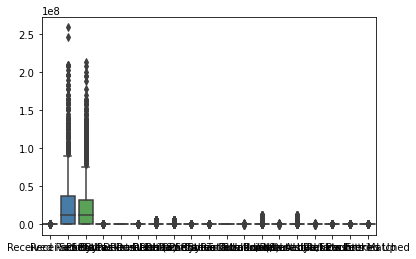

In [21]:
sns.boxplot(data = trainSet, palette="Set1")

### Test Set

In [22]:
# calculate IQR for test Set
IQR1_test = testSet.quantile(0.25)
IQR3_test = testSet.quantile(0.75)
IQR_test = IQR3_test - IQR1_test
print("Number of possible outliers per feature")
print(((testSet < (IQR1_test - 1.5 * IQR_test)) | (testSet > (IQR3_test + 1.5 * IQR_test))).sum())

Number of possible outliers per feature
Active Flow Entries               31
Connection Point                   0
Delta Port alive Duration (S)     89
Delta Received Bytes             124
Delta Received Packets           130
Delta Sent Bytes                 127
Delta Sent Packets               127
Label                              0
Latest bytes counter              76
Packets Looked Up                108
Packets Matched                  108
Port Number                        0
Port alive Duration (S)            0
Received Bytes                    38
Received Packets                  69
Sent Bytes                        54
Sent Packets                      78
Switch ID                          0
Total Load/Latest                 99
Total Load/Rate                   76
Unknown Load/Latest               99
Unknown Load/Rate                 76
dtype: int64


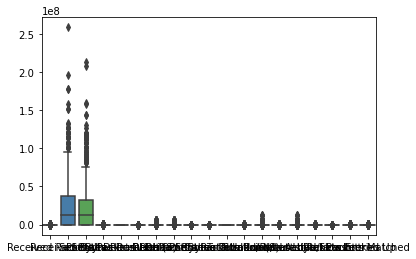

In [23]:
sns.boxplot(data = testSet, palette="Set1")

### Validation Set

In [24]:
# calculate IQR for val Set
IQR1_val = valSet.quantile(0.25)
IQR3_val = valSet.quantile(0.75)
IQR_val = IQR3_val - IQR1_val
print("Number of possible outliers per feature")
print(((valSet < (IQR1_val - 1.5 * IQR_val)) | (valSet > (IQR3_val + 1.5 * IQR_val))).sum())

Number of possible outliers per feature
Active Flow Entries               30
Connection Point                   0
Delta Port alive Duration (S)     86
Delta Received Bytes             121
Delta Received Packets           122
Delta Sent Bytes                 119
Delta Sent Packets               120
Label                              0
Latest bytes counter              60
Packets Looked Up                116
Packets Matched                  116
Port Number                        0
Port alive Duration (S)            0
Received Bytes                    34
Received Packets                  73
Sent Bytes                        54
Sent Packets                      75
Switch ID                          0
Total Load/Latest                 90
Total Load/Rate                   60
Unknown Load/Latest               90
Unknown Load/Rate                 60
dtype: int64


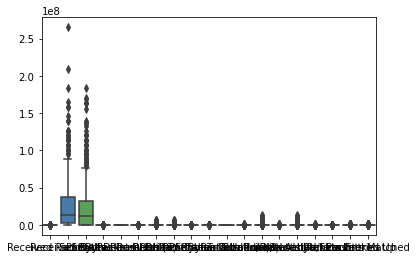

In [25]:
sns.boxplot(data = valSet, palette="Set1")

## Basic statistical analysis for every feature (mean, std, min, max)

### Train Set

In [26]:
trainSet.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2619.000000,2.619000e+03,2.619000e+03
mean,19929.095074,2.606639e+07,2.372645e+07,33676.567774,890.539137,174.948835,3.254661e+05,2.957171e+05,160.607866,4.831615,2.450935,2.044276e+04,5.033087e+05,2.044276e+04,5.033087e+05,2.044276e+04,94.972890,9.920463e+04,9.908445e+04
std,61817.860816,3.670801e+07,3.309908e+07,90565.150583,970.916789,1028.907797,1.166624e+06,1.107859e+06,972.484039,0.374279,1.159286,1.141013e+05,1.796231e+06,1.141013e+05,1.796231e+06,1.141013e+05,828.181086,2.363175e+05,2.363162e+05
min,10.000000,8.560000e+02,6.025000e+03,44.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,-6.446240e+05,0.000000e+00,-6.446240e+05,0.000000e+00,-6.446240e+05,4.000000,1.050000e+02,5.000000e+01
25%,321.500000,8.464900e+04,5.360900e+04,333.500000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.263000e+03,2.147000e+03
50%,1108.000000,1.262083e+07,1.262176e+07,1243.000000,254.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,6.968000e+03,6.843000e+03
75%,3268.500000,3.736785e+07,3.170219e+07,3727.000000,1721.000000,6.000000,8.310000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.163300e+04,2.140800e+04
max,352584.000000,2.589422e+08,2.130728e+08,420806.000000,3317.000000,15588.000000,6.171714e+06,6.302910e+06,15593.000000,5.000000,5.000000,1.260657e+06,1.275386e+07,1.260657e+06,1.275386e+07,1.260657e+06,9985.000000,1.012220e+06,1.012085e+06


### Test Set

In [27]:
testSet.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.00000,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,561.000000,5.610000e+02,5.610000e+02
mean,23141.636364,2.726677e+07,2.438093e+07,30155.998217,910.654189,149.048128,4.546660e+05,3.171120e+05,169.782531,4.841355,2.44385,1.992058e+04,6.084924e+05,1.992058e+04,6.084924e+05,1.992058e+04,61.912656,9.053312e+04,9.041352e+04
std,69278.589077,3.627827e+07,3.439084e+07,82370.302150,981.303212,861.268543,1.381151e+06,1.207563e+06,1030.484551,0.365671,1.20006,1.105112e+05,1.985467e+06,1.105112e+05,1.985467e+06,1.105112e+05,601.548185,2.235338e+05,2.235324e+05
min,10.000000,8.560000e+02,6.854000e+03,49.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.00000,-4.042080e+05,0.000000e+00,-4.042080e+05,0.000000e+00,-4.042080e+05,4.000000,1.790000e+02,9.800000e+01
25%,353.000000,1.042010e+05,4.480100e+04,322.000000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.346000e+03,2.238000e+03
50%,1376.000000,1.267023e+07,1.262299e+07,1215.000000,256.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,7.066000e+03,6.929000e+03
75%,3562.000000,3.809469e+07,3.176783e+07,4054.000000,1742.000000,19.000000,1.823000e+03,7.590000e+02,5.000000,5.000000,3.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,1.963300e+04,1.940900e+04
max,352572.000000,2.589394e+08,2.138743e+08,420932.000000,3307.000000,11130.000000,6.323770e+06,6.647966e+06,13840.000000,5.000000,5.00000,1.194922e+06,1.264637e+07,1.194922e+06,1.264637e+07,1.194922e+06,9980.000000,1.009529e+06,1.009394e+06


### Validation Set

In [28]:
valSet.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,561.000000,5.610000e+02,5.610000e+02
mean,20265.901961,2.651052e+07,2.462073e+07,26309.124777,949.360071,238.839572,3.268137e+05,2.927781e+05,162.711230,4.846702,2.422460,1.349392e+04,4.418708e+05,1.349392e+04,4.418708e+05,1.349392e+04,62.071301,8.382923e+04,8.370799e+04
std,59032.911054,3.505715e+07,3.420225e+07,75202.041514,977.609275,1149.069110,1.181636e+06,1.106077e+06,909.905479,0.360596,1.150215,9.124726e+04,1.725488e+06,9.124726e+04,1.725488e+06,9.124726e+04,601.962008,2.056357e+05,2.056371e+05
min,10.000000,8.560000e+02,7.202000e+03,50.000000,36.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,1.400000e+02,8.400000e+01
25%,379.000000,1.962210e+06,4.856800e+04,377.000000,141.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.462000e+03,2.350000e+03
50%,1385.000000,1.266395e+07,1.263028e+07,1239.000000,317.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,8.105000e+03,7.979000e+03
75%,3642.000000,3.785762e+07,3.176313e+07,3889.000000,1750.000000,5.000000,6.260000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.073500e+04,2.060700e+04
max,350280.000000,2.652568e+08,1.837435e+08,419567.000000,3287.000000,11273.000000,6.249706e+06,6.302708e+06,11273.000000,5.000000,5.000000,1.260664e+06,1.273210e+07,1.260664e+06,1.273210e+07,1.260664e+06,9979.000000,1.009010e+06,1.008875e+06


## check the correlation among the variables  

### training set

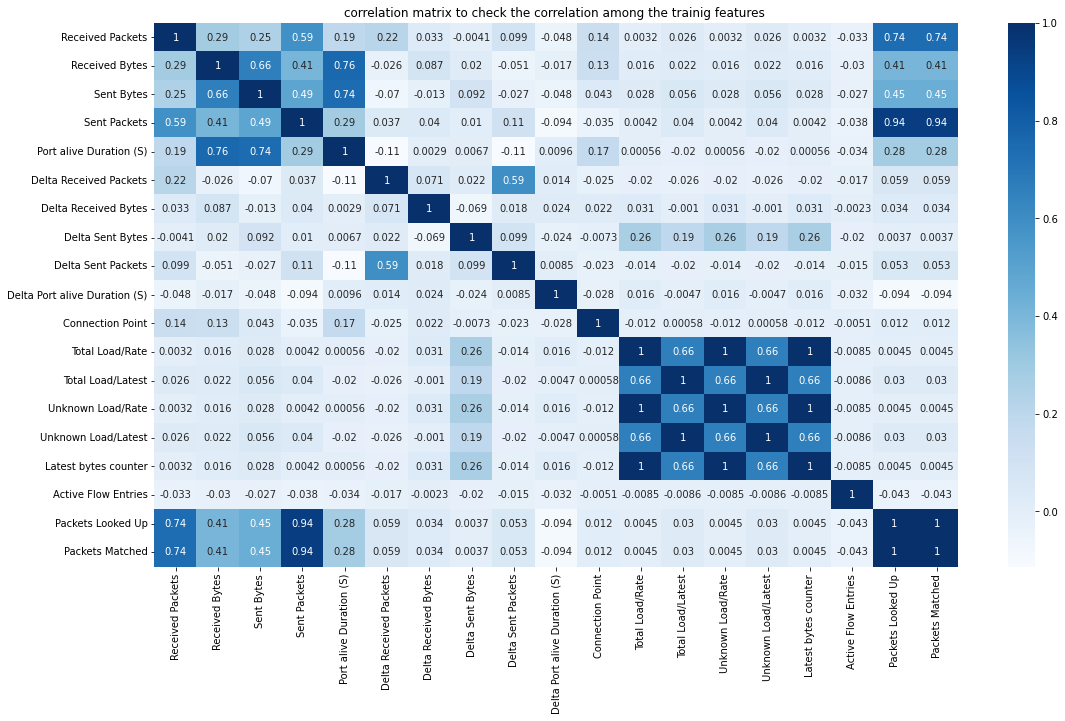

In [29]:
plt.figure(figsize=(18,10))
plt.title("correlation matrix to check the correlation among the trainig features ")
sns.heatmap(trainSet.corr(),cbar=True,annot=True,cmap='Blues')

### testing set

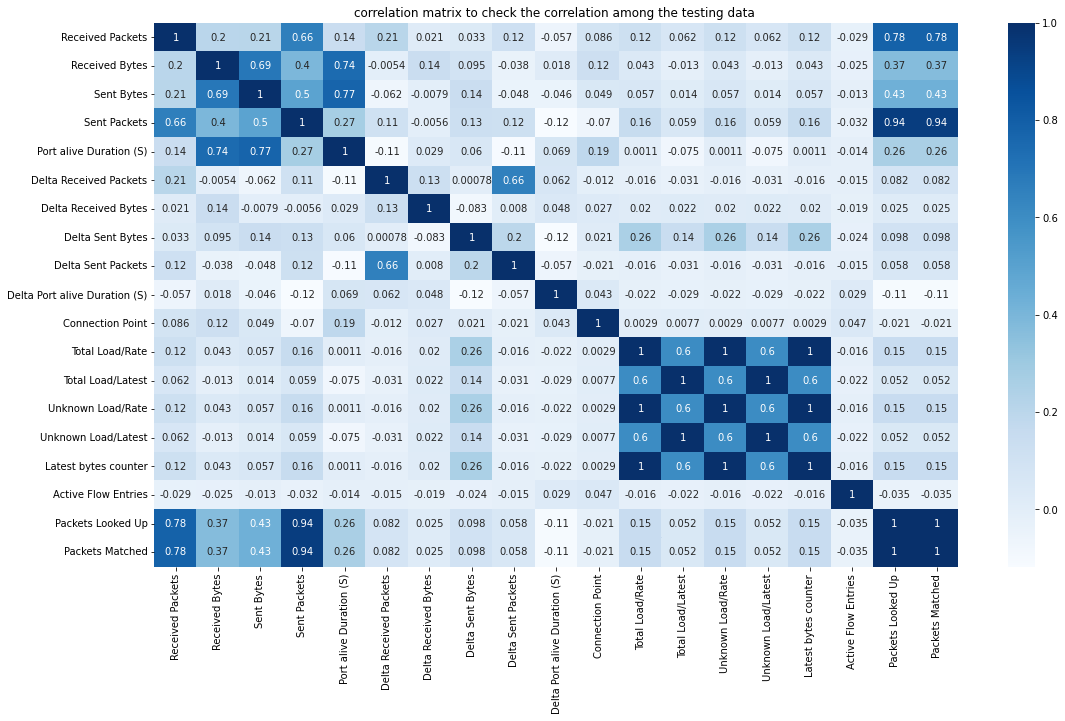

In [30]:
plt.figure(figsize=(18,10))
plt.title("correlation matrix to check the correlation among the testing data ")
sns.heatmap(testSet.corr(),cbar=True,annot=True,cmap='Blues')

### validation set 

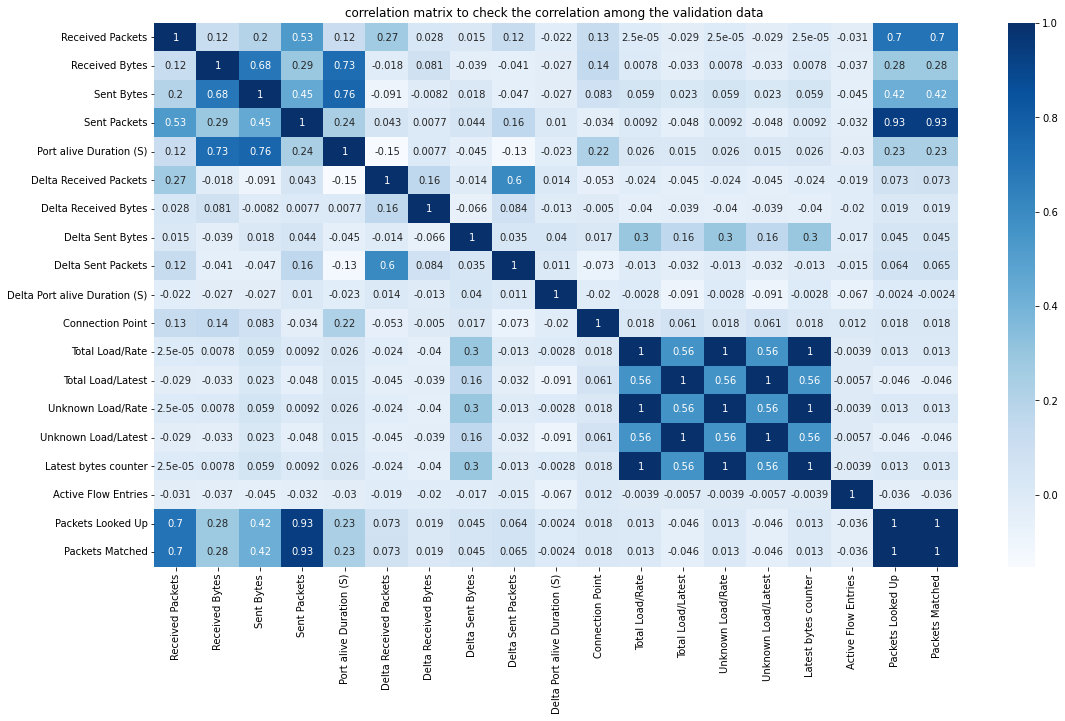

In [31]:
plt.figure(figsize=(18,10))
plt.title("correlation matrix to check the correlation among the validation data ")
sns.heatmap(valSet.corr(),cbar=True,annot=True,cmap='Blues')

## data preprocessing 

In [32]:
# split the train, validation, and test and remove feature Switch ID of them.
X_trainSet  = trainSet.iloc[:,:-1]
y_trainSet  = trainSet.iloc[:,-1:]

print(f"The shape of train data: {X_trainSet.shape} \nThe shape of train label: {y_trainSet.shape}\n")
X_valSet = valSet.iloc[:,:-1]
y_valSet = valSet.iloc[:,-1:]
print(f"The shape of validation data: {X_valSet.shape} \nThe shape of validation label: {y_valSet.shape}\n")
X_testSet = testSet.iloc[:,:-1]
y_testSet = testSet.iloc[:,-1:]
print(f"The shape of test data: {X_testSet.shape} \nThe shape of test label: {y_testSet.shape}")

The shape of train data: (2619, 21) 
The shape of train label: (2619, 1)

The shape of validation data: (561, 21) 
The shape of validation label: (561, 1)

The shape of test data: (561, 21) 
The shape of test label: (561, 1)


In [33]:
# getting the number of classes in label. 
NumClassPerLabel = Counter(y_trainSet['Label'])
print(f'The number of class in label : {len(NumClassPerLabel)}')
print('----------------------------------------------------------')
print(f'The number per class in label: {NumClassPerLabel.items()}')

The number of class in label : 6
----------------------------------------------------------
The number per class in label: dict_items([('TCP-SYN', 651), ('Normal', 254), ('PortScan', 666), ('Overflow', 73), ('Diversion', 414), ('Blackhole', 561)])


In [34]:
#int(X_trainSet['Port Number'][10].split(':')[1])

X_trainSet['Port Number'] = X_trainSet['Port Number'].apply(lambda x : int(x.split(':')[1]))
#X_trainSet['Switch ID'] = X_trainSet['Switch ID'].apply(lambda x : str(x.split(':')[1]))

X_valSet['Port Number'] = X_valSet['Port Number'].apply(lambda x : int(x.split(':')[1]))
#X_valSet['Switch ID'] = X_valSet['Switch ID'].apply(lambda x : str(x.split(':')[1]))

X_testSet['Port Number'] = X_testSet['Port Number'].apply(lambda x : int(x.split(':')[1]))
#X_testSet['Switch ID'] = X_testSet['Switch ID'].apply(lambda x : str(x.split(':')[1]))


In [35]:
print(f"the X training   shape: {X_trainSet.shape}, type {type(X_trainSet)}")
print(f"the y training   shape: {y_trainSet.shape}, type {type(y_trainSet)}")
print(f"the X validation shape: {X_valSet.shape}  , type {type(X_valSet)}")
print(f"the y validation shape: {y_valSet.shape}  , type {type(y_valSet)}")
print(f"the X testing    shape: {X_testSet.shape} , type {type(X_testSet)}")
print(f"the y testing    shape: {y_testSet.shape} , type {type(y_testSet)}")

the X training   shape: (2619, 21), type <class 'pandas.core.frame.DataFrame'>
the y training   shape: (2619, 1), type <class 'pandas.core.frame.DataFrame'>
the X validation shape: (561, 21)  , type <class 'pandas.core.frame.DataFrame'>
the y validation shape: (561, 1)  , type <class 'pandas.core.frame.DataFrame'>
the X testing    shape: (561, 21) , type <class 'pandas.core.frame.DataFrame'>
the y testing    shape: (561, 1) , type <class 'pandas.core.frame.DataFrame'>


In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_trainSet= le.fit_transform(y_trainSet)

le2 = preprocessing.LabelEncoder()
y_valSet= le2.fit_transform(y_valSet)

le3 = preprocessing.LabelEncoder()
y_testSet= le3.fit_transform(y_testSet)



In [37]:
le4 = preprocessing.LabelEncoder()
X_trainSet['Switch ID'] = le4.fit_transform(X_trainSet['Switch ID'])

le5 = preprocessing.LabelEncoder()
X_valSet['Switch ID'] = le5.fit_transform(X_valSet['Switch ID'])

le6 = preprocessing.LabelEncoder()
X_testSet['Switch ID'] = le6.fit_transform(X_testSet['Switch ID'])



X_valSet_copy = X_valSet.copy()
y_valSet_copy =y_valSet.copy()
X_trainSet_copy = X_trainSet.copy()
y_trainSet_copy =y_trainSet.copy()
X_testSet_copy = X_testSet.copy()
y_testSet_copy =y_testSet.copy()

sc = StandardScaler()
X_trainSet = sc.fit_transform(X_trainSet)
X_testSet = sc.transform(X_testSet)
X_valSet = sc.transform(X_valSet)

X_trainSet=tfa.convert_to_tensor(X_trainSet)
X_valSet = tfa.convert_to_tensor(X_valSet)
X_testSet= tfa.convert_to_tensor(X_testSet)

y_trainSet=tfa.convert_to_tensor(y_trainSet)
y_valSet = tfa.convert_to_tensor(y_valSet)
y_testSet= tfa.convert_to_tensor(y_testSet)


In [38]:
y_trainSet = tfa.keras.utils.to_categorical(y_trainSet, 6)
y_valSet   = tfa.keras.utils.to_categorical(y_valSet, 6)
y_testSet  = tfa.keras.utils.to_categorical(y_testSet, 6)

## check the destribution of each feature

we used pairplot to see both distribution of single variables and relationships between two variables 

In [39]:
def distrPlot(s):
  sns.distplot(X_trainSet_copy[s], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

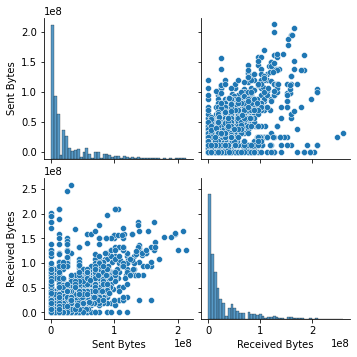

In [40]:
sns.pairplot(X_trainSet_copy[['Sent Bytes', 'Received Bytes']])

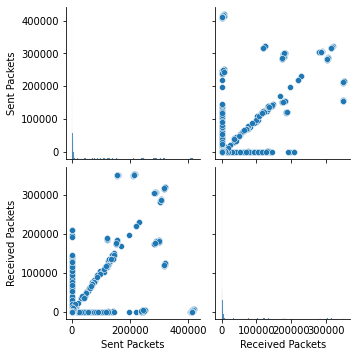

In [41]:
sns.pairplot(X_trainSet_copy[['Sent Packets', 'Received Packets']])

check the destribution of some features , each one alone , by using the distplot

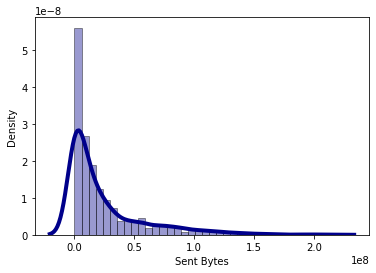

In [42]:
distrPlot('Sent Bytes')

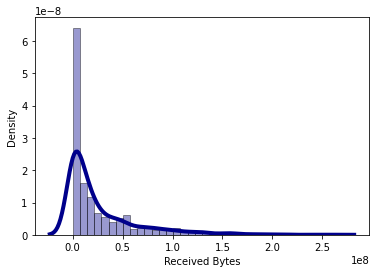

In [43]:
distrPlot('Received Bytes')

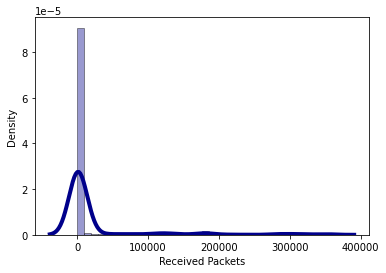

In [44]:
distrPlot('Received Packets')

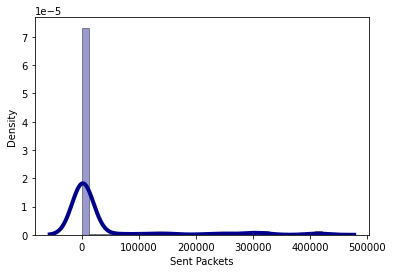

In [45]:
distrPlot('Sent Packets')

#Q1) Obtain a baseline performance



## Build an MLP classifier using the provided dataset and the default parameters

In [ ]:
# build and compile the model 
BaseLine_model ,model_history= build_compile_fit_MLP()

Epoch 1/500
2619/2619 - 2s - loss: 1.0974 - accuracy: 0.5410 - val_loss: 0.8001 - val_accuracy: 0.6542 - 2s/epoch - 828us/step
Epoch 2/500
2619/2619 - 1s - loss: 0.7745 - accuracy: 0.6770 - val_loss: 0.7037 - val_accuracy: 0.7130 - 1s/epoch - 566us/step
Epoch 3/500
2619/2619 - 1s - loss: 0.7092 - accuracy: 0.7022 - val_loss: 0.6628 - val_accuracy: 0.7398 - 1s/epoch - 563us/step
Epoch 4/500
2619/2619 - 1s - loss: 0.6781 - accuracy: 0.7121 - val_loss: 0.6442 - val_accuracy: 0.7665 - 1s/epoch - 565us/step
Epoch 5/500
2619/2619 - 1s - loss: 0.6590 - accuracy: 0.7136 - val_loss: 0.6294 - val_accuracy: 0.7398 - 1s/epoch - 567us/step
Epoch 6/500
2619/2619 - 1s - loss: 0.6460 - accuracy: 0.7278 - val_loss: 0.6246 - val_accuracy: 0.7326 - 1s/epoch - 565us/step
Epoch 7/500
2619/2619 - 1s - loss: 0.6371 - accuracy: 0.7308 - val_loss: 0.6249 - val_accuracy: 0.7398 - 1s/epoch - 567us/step
Epoch 8/500
2619/2619 - 1s - loss: 0.6279 - accuracy: 0.7342 - val_loss: 0.6225 - val_accuracy: 0.7398 - 1s/epo

In [ ]:
BaseLine_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                220       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


## Plot the training and testing losses vs. the number of epochs

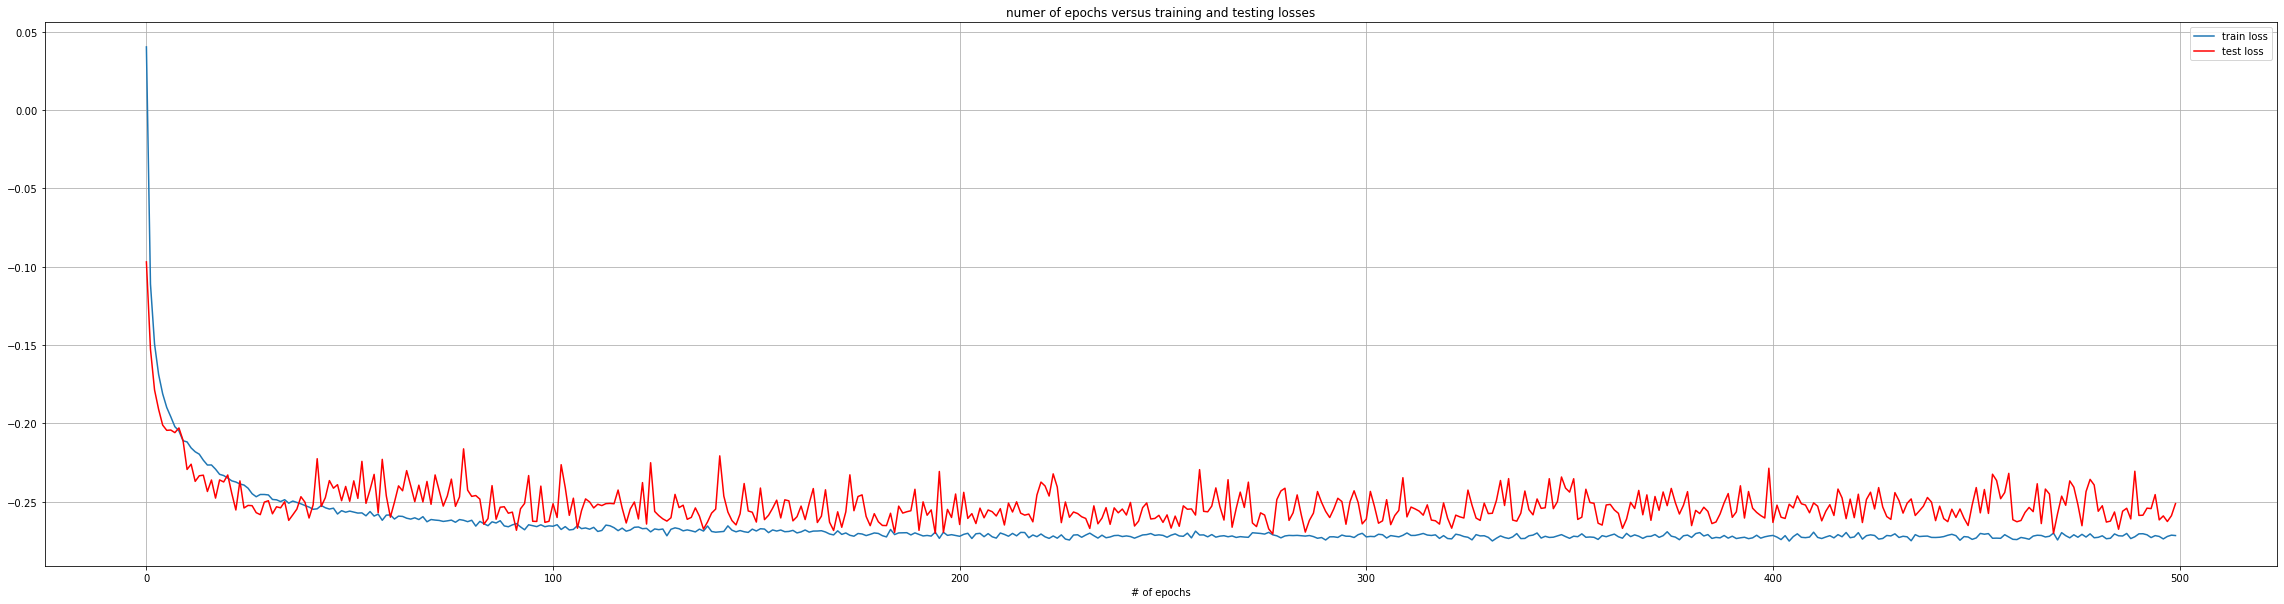

In [ ]:
plot_n_Epoch_VS_Accuracy(model_history)

In [ ]:
training_Acc,testing_Acc,val_acc = get_accuracies(BaseLine_model,model_history)

18/18 [==============================] - 0s 653us/step - loss: 0.5491 - accuracy: 0.7576


In [ ]:
print("the BaseLine (training , testing , validation) accuracies ")
print(f"training accuracy :{training_Acc:.2f}%")
print(f"testing  accuracy :{testing_Acc:.2f}%")
print(f"validation  accuracy :{val_acc:.2f}%")

the BaseLine (training , testing , validation) accuracies 
training accuracy :77.17%
testing  accuracy :76.47%
validation  accuracy :75.76%


In [ ]:
testAccBaseLine=testing_Acc

## Complete the table below, and provide the confusion matrix based on the average test accuracy 

In [ ]:
# All average accuracies should be taken over 10 different runs.
max_train_acc,min_train_acc,avg_train_acc ,max_test_acc ,min_test_acc , avg_test_acc , total_training_loss ,total_testing_loss ,total_y_pred , total_y_pred_result,avg_val_acc= build_5_time_testingBased()

run 1:
Epoch 1/500
2619/2619 - 2s - loss: 1.1866 - accuracy: 0.5277 - val_loss: 0.8148 - val_accuracy: 0.6328 - 2s/epoch - 722us/step
Epoch 2/500
2619/2619 - 1s - loss: 0.7671 - accuracy: 0.6690 - val_loss: 0.7180 - val_accuracy: 0.7166 - 1s/epoch - 569us/step
Epoch 3/500
2619/2619 - 1s - loss: 0.6995 - accuracy: 0.6991 - val_loss: 0.6800 - val_accuracy: 0.7344 - 1s/epoch - 568us/step
Epoch 4/500
2619/2619 - 1s - loss: 0.6658 - accuracy: 0.7247 - val_loss: 0.6395 - val_accuracy: 0.7398 - 1s/epoch - 571us/step
Epoch 5/500
2619/2619 - 1s - loss: 0.6439 - accuracy: 0.7350 - val_loss: 0.6322 - val_accuracy: 0.7433 - 1s/epoch - 570us/step
Epoch 6/500
2619/2619 - 2s - loss: 0.6263 - accuracy: 0.7507 - val_loss: 0.6254 - val_accuracy: 0.7576 - 2s/epoch - 573us/step
Epoch 7/500
2619/2619 - 2s - loss: 0.6163 - accuracy: 0.7484 - val_loss: 0.6043 - val_accuracy: 0.7558 - 2s/epoch - 585us/step
Epoch 8/500
2619/2619 - 2s - loss: 0.6100 - accuracy: 0.7541 - val_loss: 0.5973 - val_accuracy: 0.7558 -

In [ ]:
draw_df(max_train_acc,max_test_acc,min_train_acc,min_test_acc,avg_train_acc,avg_test_acc)

,Max training acc ()%,Max test acc ()%,Min training acc ()%,Min test acc ()%,Avg training acc ()%,Avg test acc ()%
0,79.610538,78.609627,78.006876,75.935829,78.770524,77.611408


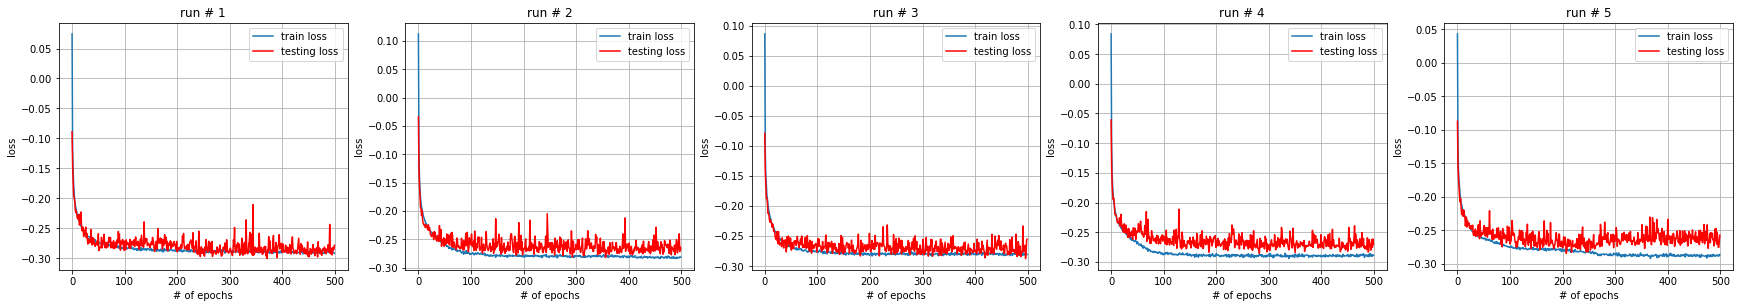

In [ ]:
# plot the 10 run : training loss versus the testing loss 
plot_trLoss_VS_tsLoss_5_times(total_training_loss,total_testing_loss)

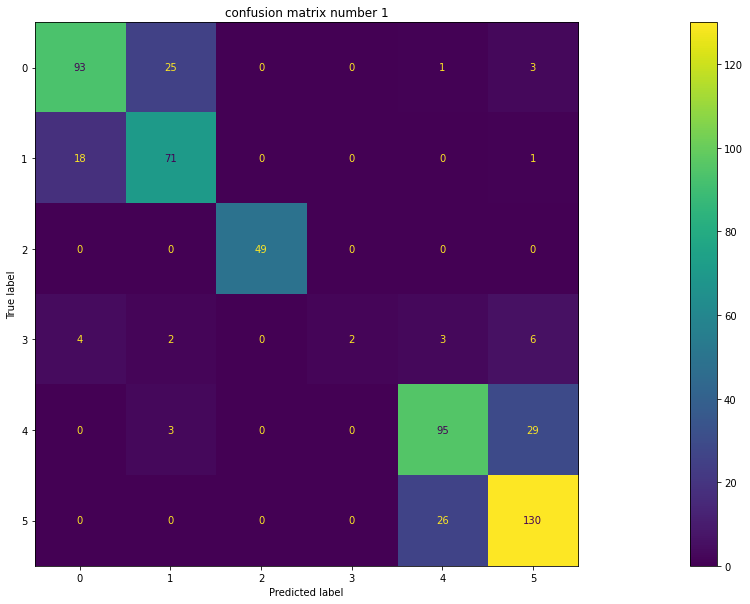

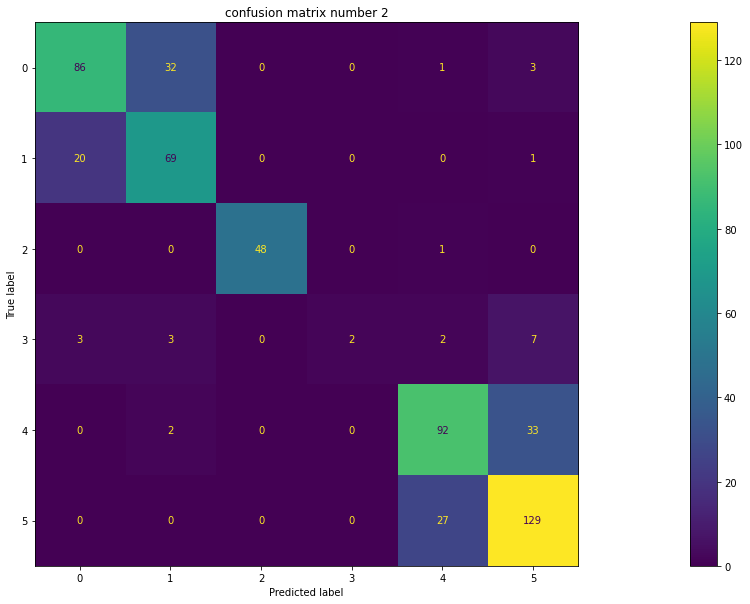

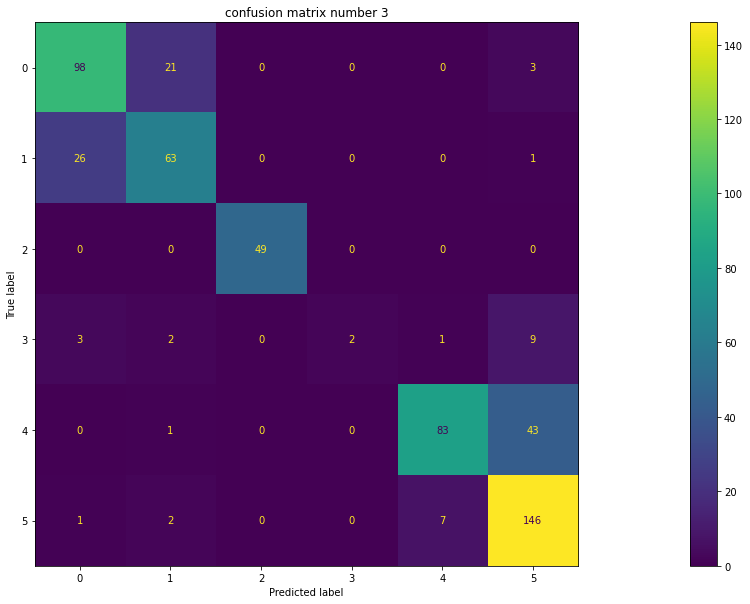

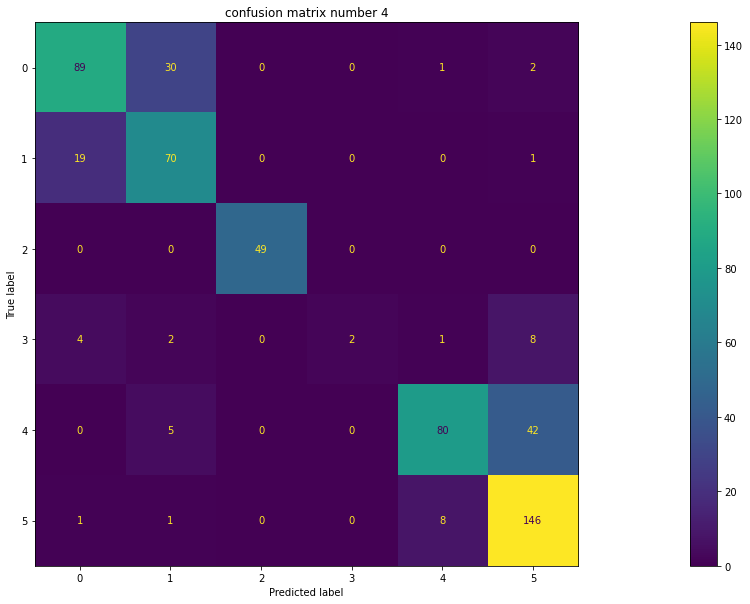

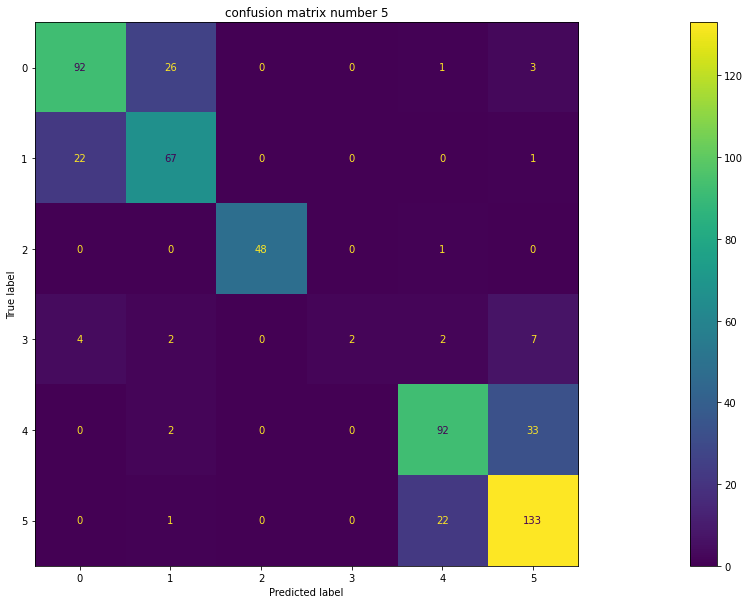

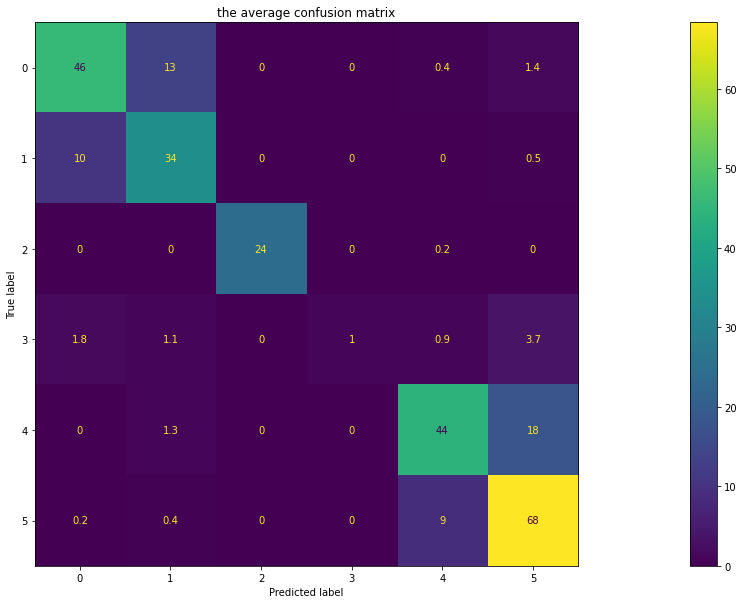

In [ ]:
plot_avg_confusion_matrix(total_y_pred)

## Provide 2D TSNE plots, one for the training set, one for the test set, and one for the validation

18/18 [==============================] - 0s 476us/step
[-5.816312 68.940254]
[ 45.440918 -28.565622]
[ 8.185409 24.01925 ]


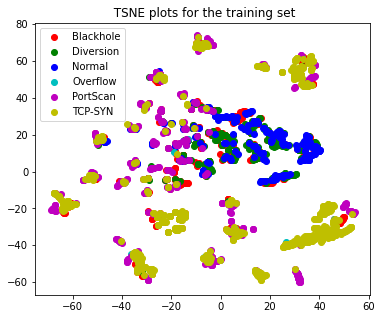

[-35.506824   7.902663]
[10.407783   2.6122706]
[ 14.397974 -23.683094]


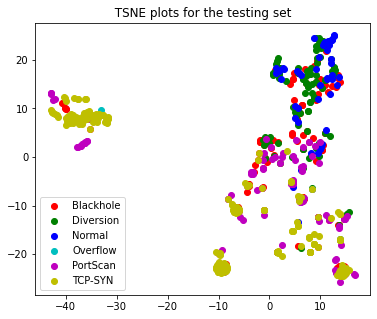

[-16.545113    7.8891964]
[41.21112  -2.931242]
[-1.6335298  8.083057 ]


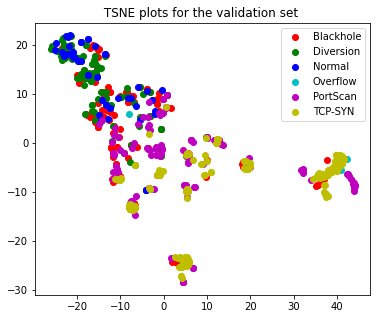

In [ ]:
y_pred_training=BaseLine_model.predict(X_trainSet)
y_pred_training_label=np.argmax(y_pred_training,axis=1)
 

y_pred_testing=BaseLine_model.predict(X_testSet)
y_pred_testing_label=np.argmax(y_pred_testing,axis=1)


y_pred_validation=BaseLine_model.predict(X_valSet)
y_pred_validation_label=np.argmax(y_pred_validation,axis=1)


target_names=['Blackhole','Diversion', 'Normal','Overflow','PortScan','TCP-SYN' ]
 
plot_tsne(X_trainSet_copy.values, y_pred_training_label, target_names,"  TSNE plots for the training set ")
plot_tsne(X_testSet_copy.values, y_pred_testing_label, target_names,"  TSNE plots for the testing set  ")
plot_tsne(X_valSet_copy.values, y_pred_validation_label, target_names," TSNE plots for the validation set  ")

# Q2) Compre dimensionality reduction to feature selection

In [51]:
def build_compile_fit_MLP_DifferentData(BS=1,HL=1,LR=0.001,AF='relu',op=None,X_trainSet=None, y_trainSet=None, X_valSet=None,y_valSet=None):
  model = tfa.keras.Sequential()
  # add the input layer
  input =  tfa.keras.layers.Input(shape=(X_trainSet.shape[1],))
  model.add(input)
  # add the hidden layers 
  for h in range(HL):
    model.add(tfa.keras.layers.Dense(10, activation=AF)) 
    
  # add the output layer 
  model.add(tfa.keras.layers.Dense(len(NumClassPerLabel), activation='softmax'))
  if(op == None):
    optimizer=AdamW(learning_rate=LR, weight_decay=.00001)
  else : 
    optimizer = op
  # compile the model 
  model.compile(
    loss=tfa.keras.losses.categorical_crossentropy,
    optimizer = optimizer,metrics=['accuracy'])
  
  # fit the model 
  history = model.fit(x= X_trainSet,y = y_trainSet, validation_data= (X_valSet, y_valSet),epochs=50, batch_size=BS, verbose=2)
  return model, history


##Q2.1) Dimensionality reduction

###Find the best value for n_components based on the test accuracy of the MLP classifier, using Principal Component Analysis,
○PCA(n_components=n, random_state=0)

In [ ]:
from sklearn.decomposition import PCA
numFeatures = X_trainSet.shape[1]
print(f'The number of features: {numFeatures}')
listTestAcc = []
for f in range(1,numFeatures+1):
  pca = PCA(n_components=f, random_state=0)
  X_trainSet_AfterPCA = pca.fit_transform(X_trainSet)
  X_valSet_AfterPCA = pca.transform(X_valSet)
  X_testSet_AfterPCA = pca.transform(X_testSet)
  print(f"Training by {f} component on MLP classifier After using PCA to:")
  model_ByPCA, historyModel_ByPCA = build_compile_fit_MLP_DifferentData(X_trainSet=X_trainSet_AfterPCA,X_valSet=X_valSet_AfterPCA, y_trainSet=y_trainSet,y_valSet=y_valSet)
  testAcc = model_ByPCA.evaluate(X_testSet_AfterPCA,y_testSet, verbose=0)[1]*100
  listTestAcc.append(testAcc)
  print('-------------------------------------------------------------------------------------------------------------------------')
  

The number of features: 21
Training by 1 component on MLP classifier After using PCA to:
Epoch 1/50
2619/2619 - 2s - loss: 1.5017 - accuracy: 0.3475 - val_loss: 1.3856 - val_accuracy: 0.3797 - 2s/epoch - 708us/step
Epoch 2/50
2619/2619 - 1s - loss: 1.3528 - accuracy: 0.4181 - val_loss: 1.3241 - val_accuracy: 0.4064 - 1s/epoch - 542us/step
Epoch 3/50
2619/2619 - 1s - loss: 1.3094 - accuracy: 0.4624 - val_loss: 1.2879 - val_accuracy: 0.4242 - 1s/epoch - 531us/step
Epoch 4/50
2619/2619 - 1s - loss: 1.2862 - accuracy: 0.4700 - val_loss: 1.2685 - val_accuracy: 0.4545 - 1s/epoch - 552us/step
Epoch 5/50
2619/2619 - 1s - loss: 1.2740 - accuracy: 0.4693 - val_loss: 1.2538 - val_accuracy: 0.4314 - 1s/epoch - 537us/step
Epoch 6/50
2619/2619 - 1s - loss: 1.2657 - accuracy: 0.4654 - val_loss: 1.2488 - val_accuracy: 0.4421 - 1s/epoch - 529us/step
Epoch 7/50
2619/2619 - 1s - loss: 1.2588 - accuracy: 0.4689 - val_loss: 1.2437 - val_accuracy: 0.4492 - 1s/epoch - 528us/step
Epoch 8/50
2619/2619 - 1s - l

In [ ]:
Df_lstAccTest = pd.DataFrame(listTestAcc,index = range(1,numFeatures+1))
Df_lstAccTest

,0
1,48.306596
2,54.723710
3,66.488415
4,65.240639
5,68.805707
6,68.805707
7,69.875222
8,71.479499
9,72.192514
10,73.440284


In [ ]:
print(f'{Df_lstAccTest.idxmax()[0]} components is the best value based on the test accuracy of the MLP classifier: {Df_lstAccTest.max()[0]}%')

19 components is the best value based on the test accuracy of the MLP classifier: 79.67914342880249%


###Plot the (number of component-test accuracy) graph with the baseline performance.

In [ ]:
def DrawComponentPCA(title, lst_names, lst_Accuracies):
  plt.bar(lst_names,lst_Accuracies,width=0.5)
  plt.title(title)
  plt.xlabel('PCA')
  plt.xticks(ha='right')
  plt.ylabel('Accurracy Text')
  plt.show()

In [ ]:
listTestAccFull = listTestAcc
listTestAccFull.append(testAccBaseLine)
lstNames =[('Component '+str(x)) for x in range(1,numFeatures+1)]
lstNames.append("ModelBaseLine")

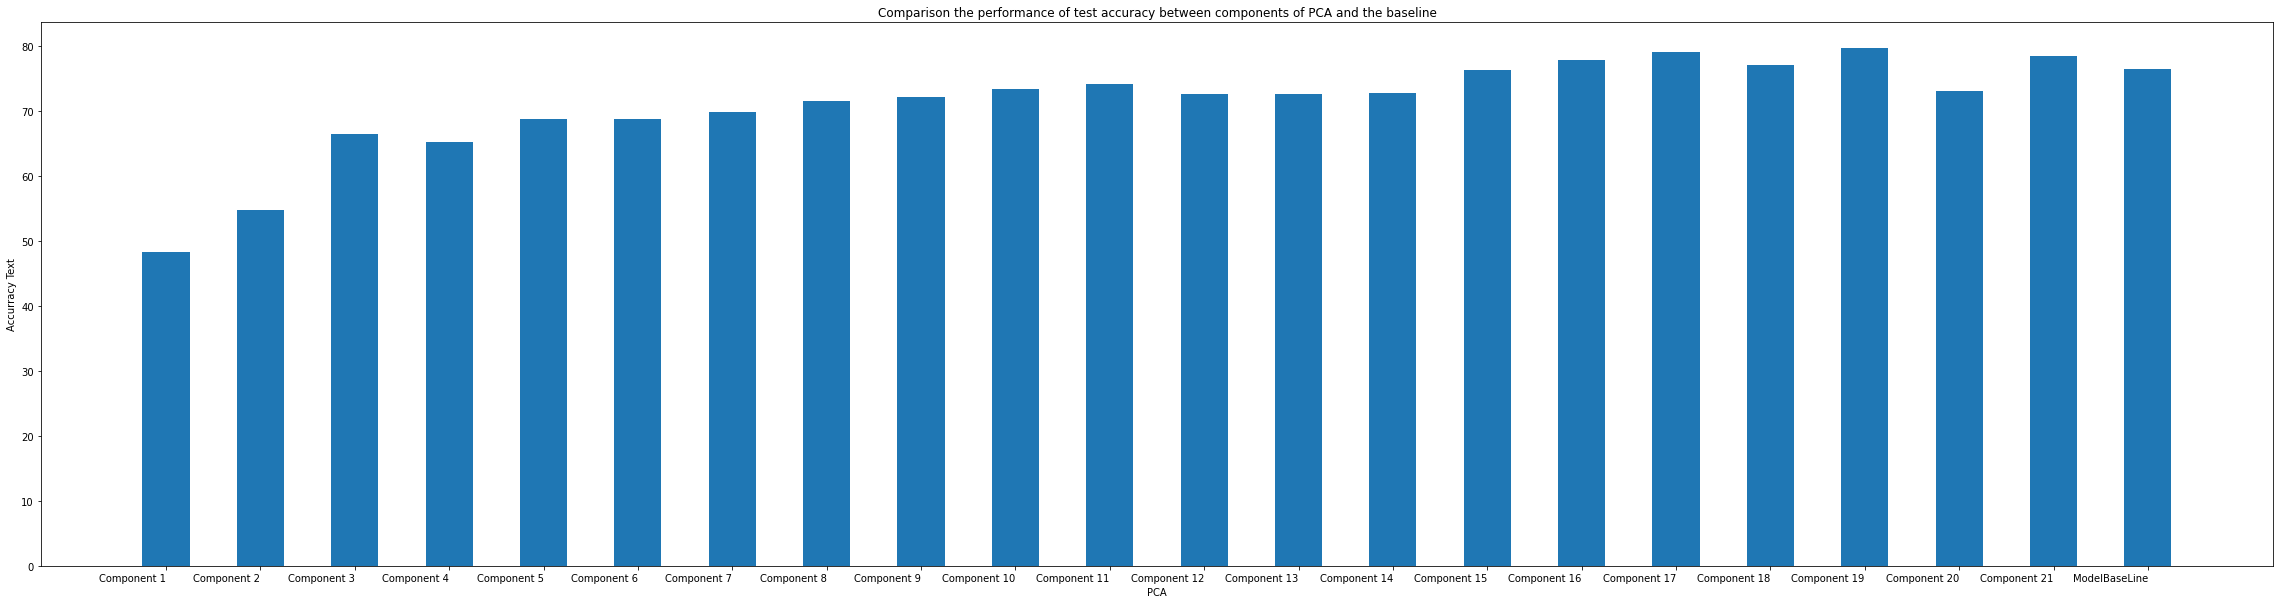

In [ ]:
DrawComponentPCA("Comparison the performance of test accuracy between components of PCA and the baseline",lstNames,listTestAccFull)

###Apply TSNE(n_components=2, random_state=0) to visualise the training and test datasets after DR

In [ ]:
print(f'{Df_lstAccTest.idxmax()[0]} components is the best value based on the test accuracy of the MLP classifier: {Df_lstAccTest.max()[0]}%')

19 components is the best value based on the test accuracy of the MLP classifier: 79.67914342880249%


In [52]:
pca_BybestComponent = PCA(n_components=Df_lstAccTest.idxmax()[0], random_state=0)
X_trainSet_AfterPCA_BybestComponent = pca_BybestComponent.fit_transform(X_trainSet)
X_valSet_AfterPCA_BybestComponent = pca_BybestComponent.transform(X_valSet)
X_testSet_AfterPCA_BybestComponent = pca_BybestComponent.transform(X_testSet)
model_PCAbybestComponent, historyModel_PCAbybestComponent = build_compile_fit_MLP_DifferentData(X_trainSet=X_trainSet_AfterPCA_BybestComponent,X_valSet=X_valSet_AfterPCA_BybestComponent, y_trainSet=y_trainSet,y_valSet=y_valSet)


Epoch 1/50
2619/2619 - 8s - loss: 1.2448 - accuracy: 0.5155 - val_loss: 0.8597 - val_accuracy: 0.6702 - 8s/epoch - 3ms/step
Epoch 2/50
2619/2619 - 5s - loss: 0.7767 - accuracy: 0.6831 - val_loss: 0.7086 - val_accuracy: 0.7112 - 5s/epoch - 2ms/step
Epoch 3/50
2619/2619 - 6s - loss: 0.6902 - accuracy: 0.7068 - val_loss: 0.6695 - val_accuracy: 0.7201 - 6s/epoch - 2ms/step
Epoch 4/50
2619/2619 - 6s - loss: 0.6597 - accuracy: 0.7201 - val_loss: 0.6538 - val_accuracy: 0.7255 - 6s/epoch - 2ms/step
Epoch 5/50
2619/2619 - 6s - loss: 0.6430 - accuracy: 0.7308 - val_loss: 0.6366 - val_accuracy: 0.7291 - 6s/epoch - 2ms/step
Epoch 6/50
2619/2619 - 5s - loss: 0.6319 - accuracy: 0.7312 - val_loss: 0.6163 - val_accuracy: 0.7398 - 5s/epoch - 2ms/step
Epoch 7/50
2619/2619 - 6s - loss: 0.6221 - accuracy: 0.7358 - val_loss: 0.6043 - val_accuracy: 0.7469 - 6s/epoch - 2ms/step
Epoch 8/50
2619/2619 - 6s - loss: 0.6130 - accuracy: 0.7465 - val_loss: 0.6240 - val_accuracy: 0.7629 - 6s/epoch - 2ms/step
Epoch 9/

In [53]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model_PCAbybestComponent.save('model_PCAbybestComponent.h5')
# Recreate the exact same model, including its weights and the optimizer
model_PCAbybestComponent = tfa.keras.models.load_model('model_PCAbybestComponent.h5')
# Show the model architecture
model_PCAbybestComponent.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                200       
                                                                 
 dense_57 (Dense)            (None, 6)                 66        
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


In [58]:
pred_AfterPCA_BybestComponent = model_PCAbybestComponent.predict(X_trainSet_AfterPCA_BybestComponent)
labels_PCA_trainSet = np.argmax(pred_AfterPCA_BybestComponent, axis=1)

In [54]:
pred_AfterPCA_BybestComponent = model_PCAbybestComponent.predict(X_testSet_AfterPCA_BybestComponent)
labels_PCA_testSet = np.argmax(pred_AfterPCA_BybestComponent, axis=1)

In [56]:
from sklearn.manifold import TSNE
import seaborn as sns
def plotTSNE(title, data , labels) : 
  # using TSNE to reduce the dimension 
  tsn = TSNE(n_components=2)
  tsn= tsn.fit_transform(data)
  # ploting our data 
  plt.figure(figsize=(15,8))
  plt.title(title)
  sns.scatterplot(tsn[:,0], tsn[:,1], hue=labels, data= data, s=200)

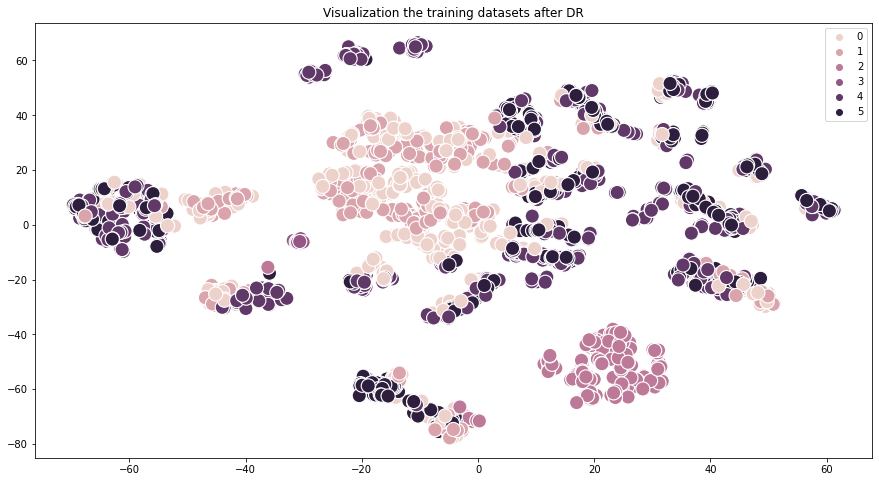

In [59]:
plotTSNE("Visualization the training datasets after DR",X_trainSet_AfterPCA_BybestComponent, labels_PCA_trainSet)

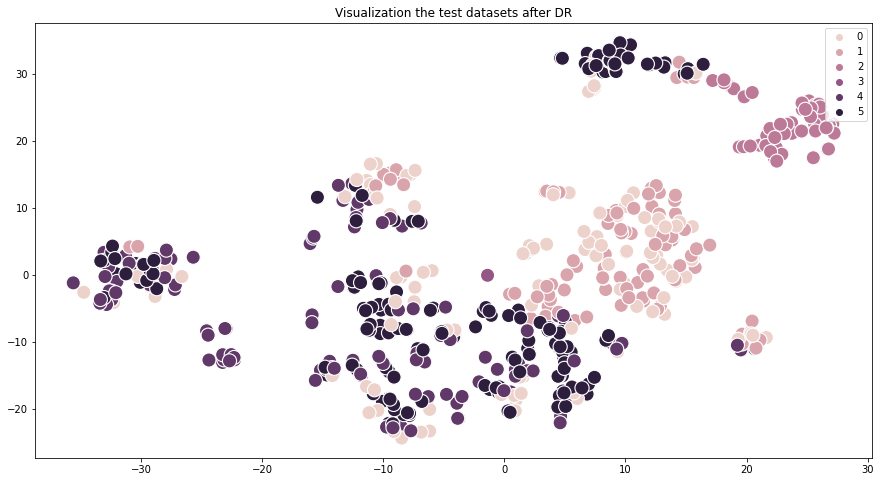

In [60]:
plotTSNE("Visualization the test datasets after DR",X_testSet_AfterPCA_BybestComponent, labels_PCA_testSet)

##Q2.2) Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

def get_thebestnumberfeatures(methods):
  listTestAcc_fs = []
  for f in range(1,numFeatures+1):
      # configure to select all features
      fs = SelectKBest(score_func=methods, k=f)
      # learn relationship from training data
      y_trainSet_fs = trainSet.iloc[:,-1:]
      X_trainSet_After_fs = fs.fit_transform(X_trainSet, y_trainSet_fs)
      X_valSet_After_fs= fs.transform(X_valSet)
      X_testSet_After_fs = fs.transform(X_testSet)
      print(f"Training by {f} best feature on MLP classifier After using {methods} to:")
      model, historyModel = build_compile_fit_MLP_DifferentData(X_trainSet=X_trainSet_After_fs,X_valSet=X_valSet_After_fs, y_trainSet=y_trainSet,y_valSet=y_valSet)
      testAcc_fs = model.evaluate(X_testSet_After_fs,y_testSet, verbose=0)[1]*100
      listTestAcc_fs.append(testAcc_fs)
      print('-------------------------------------------------------------------------------------------------------------------------')
  return listTestAcc_fs

###Find the best number of features based on the MLP test accuracy, using the feature selection methods:
○ANOVA \
○Mutual Information

#### ANOVA(f_classif)

In [ ]:
listTestAccANOVA = get_thebestnumberfeatures(f_classif)


Training by 1 best feature on MLP classifier After using <function f_classif at 0x000001AEBF936160> to:
Epoch 1/50
2619/2619 - 2s - loss: 1.4083 - accuracy: 0.3685 - val_loss: 1.2831 - val_accuracy: 0.4314 - 2s/epoch - 694us/step
Epoch 2/50
2619/2619 - 1s - loss: 1.2362 - accuracy: 0.4544 - val_loss: 1.2145 - val_accuracy: 0.4349 - 1s/epoch - 549us/step
Epoch 3/50
2619/2619 - 1s - loss: 1.2003 - accuracy: 0.4590 - val_loss: 1.1914 - val_accuracy: 0.4349 - 1s/epoch - 540us/step
Epoch 4/50
2619/2619 - 1s - loss: 1.1846 - accuracy: 0.4612 - val_loss: 1.1717 - val_accuracy: 0.4385 - 1s/epoch - 540us/step
Epoch 5/50
2619/2619 - 1s - loss: 1.1763 - accuracy: 0.4662 - val_loss: 1.1676 - val_accuracy: 0.4385 - 1s/epoch - 545us/step
Epoch 6/50
2619/2619 - 1s - loss: 1.1674 - accuracy: 0.4754 - val_loss: 1.1579 - val_accuracy: 0.4581 - 1s/epoch - 544us/step
Epoch 7/50
2619/2619 - 1s - loss: 1.1572 - accuracy: 0.5048 - val_loss: 1.1513 - val_accuracy: 0.4617 - 1s/epoch - 543us/step
Epoch 8/50
261

In [ ]:
Df_lstAccTestANOVA = pd.DataFrame(listTestAccANOVA,index = range(1,numFeatures+1))
Df_lstAccTestANOVA

,0
1,57.040995
2,57.754010
3,58.467025
4,71.479499
5,71.479499
6,70.944744
7,70.944744
8,74.331552
9,76.827097
10,75.757575


In [ ]:
print(f'{Df_lstAccTestANOVA.idxmax()[0]} features is the best number of features based on the MLP test accuracy {Df_lstAccTestANOVA.max()[0]}%')

11 features is the best number of features based on the MLP test accuracy 78.60962748527527%


#### Mutual Information (mutual_info_classif)

In [ ]:
listTestAccMutualInformation = get_thebestnumberfeatures(mutual_info_classif)

Training by 1 best feature on MLP classifier After using <function mutual_info_classif at 0x000001AEC0B25940> to:
Epoch 1/50
2619/2619 - 2s - loss: 1.2853 - accuracy: 0.4047 - val_loss: 1.0965 - val_accuracy: 0.4439 - 2s/epoch - 687us/step
Epoch 2/50
2619/2619 - 1s - loss: 1.1050 - accuracy: 0.4422 - val_loss: 1.0616 - val_accuracy: 0.5330 - 1s/epoch - 528us/step
Epoch 3/50
2619/2619 - 1s - loss: 1.0865 - accuracy: 0.4609 - val_loss: 1.0466 - val_accuracy: 0.4759 - 1s/epoch - 532us/step
Epoch 4/50
2619/2619 - 1s - loss: 1.0779 - accuracy: 0.4563 - val_loss: 1.0367 - val_accuracy: 0.5455 - 1s/epoch - 531us/step
Epoch 5/50
2619/2619 - 1s - loss: 1.0716 - accuracy: 0.4700 - val_loss: 1.0309 - val_accuracy: 0.5116 - 1s/epoch - 536us/step
Epoch 6/50
2619/2619 - 1s - loss: 1.0674 - accuracy: 0.4712 - val_loss: 1.0328 - val_accuracy: 0.4777 - 1s/epoch - 539us/step
Epoch 7/50
2619/2619 - 1s - loss: 1.0642 - accuracy: 0.4811 - val_loss: 1.0193 - val_accuracy: 0.5009 - 1s/epoch - 531us/step
Epoc

In [ ]:
Df_lstAccTestMutualInformation = pd.DataFrame(listTestAccMutualInformation,index = range(1,numFeatures+1))
Df_lstAccTestMutualInformation

,0
1,46.345812
2,71.657753
3,71.479499
4,72.905529
5,70.766491
6,71.479499
7,73.618537
8,73.262030
9,71.122992
10,74.331552


In [ ]:
print(f'{Df_lstAccTestMutualInformation.idxmax()[0]} features is the best number of features based on the MLP test accuracy {Df_lstAccTestMutualInformation.max()[0]}%')

19 features is the best number of features based on the MLP test accuracy 78.2531201839447%


####Choose the method that achieves the best test accuracy results (either the filter or wrapper), and provide 2D TSNE plots, one for the training set and one for the test set.

In [ ]:
def Build_FS_Bythebestnumberfeatures(typeMethod,methods, bestK):
  listTestAcc_fs = []
  # configure to select all features
  fs = SelectKBest(score_func=methods, k=bestK)
  # learn relationship from training data
  y_trainSet_fs = trainSet.iloc[:,-1:]
  X_trainSet_After_fs = fs.fit_transform(X_trainSet, y_trainSet_fs)
  X_valSet_After_fs= fs.transform(X_valSet)
  X_testSet_After_fs = fs.transform(X_testSet)
  print(f"Training by {bestK} best feature on MLP classifier After using {typeMethod} to:")
  model, historyModel = build_compile_fit_MLP_DifferentData(X_trainSet=X_trainSet_After_fs,X_valSet=X_valSet_After_fs, y_trainSet=y_trainSet,y_valSet=y_valSet)
  pred_After_FS_trainSet = model.predict(X_trainSet_After_fs)
  labels_After_FS_trainSet= np.argmax(pred_After_FS_trainSet, axis=1)
  pred_After_FS_testSet = model.predict(X_testSet_After_fs)
  labels_After_FS_testSet = np.argmax(pred_After_FS_testSet, axis=1)
  return model, historyModel, X_trainSet_After_fs, X_testSet_After_fs,X_valSet_After_fs, labels_After_FS_trainSet, labels_After_FS_testSet

In [ ]:
print(f'{Df_lstAccTestANOVA.idxmax()[0]} features is the best number of features based on the MLP test accuracy {Df_lstAccTestANOVA.max()[0]}%')

11 features is the best number of features based on the MLP test accuracy 78.60962748527527%


In [ ]:
print(f'{Df_lstAccTestMutualInformation.idxmax()[0]} features is the best number of features based on the MLP test accuracy {Df_lstAccTestMutualInformation.max()[0]}%')

19 features is the best number of features based on the MLP test accuracy 78.2531201839447%


The method that achieves the best test accuracy results is ANOVA (78.60962748527527) by using 11 features
Training by 11 best feature on MLP classifier After using ANOVA to:
Epoch 1/50
2619/2619 - 2s - loss: 1.1999 - accuracy: 0.5193 - val_loss: 0.7966 - val_accuracy: 0.6952 - 2s/epoch - 694us/step
Epoch 2/50
2619/2619 - 1s - loss: 0.7605 - accuracy: 0.6888 - val_loss: 0.6982 - val_accuracy: 0.7094 - 1s/epoch - 555us/step
Epoch 3/50
2619/2619 - 1s - loss: 0.7091 - accuracy: 0.7068 - val_loss: 0.6621 - val_accuracy: 0.7201 - 1s/epoch - 549us/step
Epoch 4/50
2619/2619 - 1s - loss: 0.6819 - accuracy: 0.7174 - val_loss: 0.6368 - val_accuracy: 0.7291 - 1s/epoch - 546us/step
Epoch 5/50
2619/2619 - 1s - loss: 0.6638 - accuracy: 0.7197 - val_loss: 0.6229 - val_accuracy: 0.7344 - 1s/epoch - 548us/step
Epoch 6/50
2619/2619 - 1s - loss: 0.6520 - accuracy: 0.7247 - val_loss: 0.6105 - val_accuracy: 0.7362 - 1s/epoch - 550us/step
Epoch 7/50
2619/2619 - 1s - loss: 0.6421 - accuracy: 0.7358 - val_loss

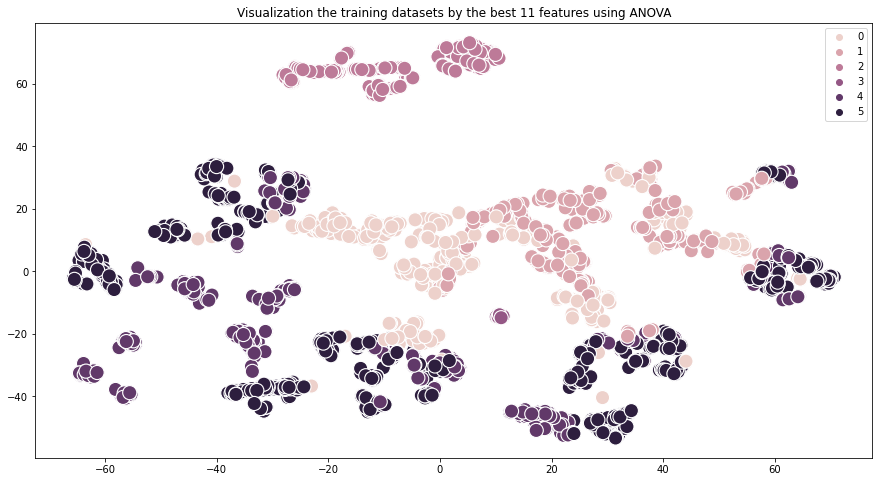

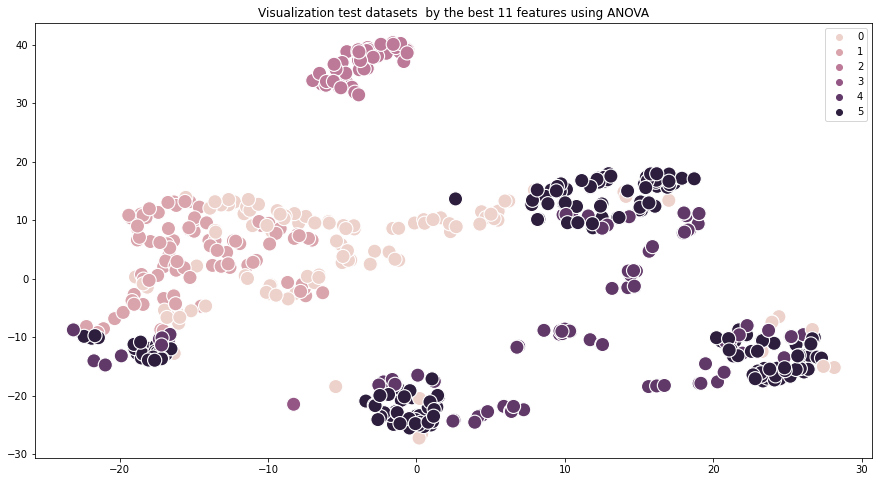

In [ ]:
if(Df_lstAccTestANOVA.max()[0] > Df_lstAccTestMutualInformation.max()[0]):
  bestFeatures = Df_lstAccTestANOVA.idxmax()[0]
  print(f"The method that achieves the best test accuracy results is ANOVA ({Df_lstAccTestANOVA.max()[0]}) by using {bestFeatures} features")
  modelANOVA, modelHistoryANOVA, X_trainSet_After_ANOVA, X_testSet_After_ANOVA, X_valSet_After_ANOVA, labels_After_ANOVA_trainSet, labels_After_ANOVA_testSet = Build_FS_Bythebestnumberfeatures("ANOVA", f_classif, bestFeatures)
  plotTSNE(f"Visualization the training datasets by the best {bestFeatures} features using ANOVA",X_trainSet_After_ANOVA, labels_After_ANOVA_trainSet)
  plotTSNE(f"Visualization test datasets  by the best {bestFeatures} features using ANOVA",X_testSet_After_ANOVA, labels_After_ANOVA_testSet)
else:
  bestFeatures = Df_lstAccTestMutualInformation.idxmax()[0]
  print(f"The method that achieves the best test accuracy results is Mutual Information ({Df_lstAccTestANOVA.max()[0]}) by using {bestFeatures} features")
  modelMutualInformation, modelHistoryMutualInformation, X_trainSet_After_MutualInformation, X_testSet_After_MutualInformation,X_valSet_After_MutualInformation, labels_After_MutualInformation_trainSet, labels_After_MutualInformation_testSet = Build_FS_Bythebestnumberfeatures("Mutual Information", mutual_info_classif, bestFeatures)
  plotTSNE(f"Visualization the training datasets by the best {bestFeatures} features using Mutual Information",X_trainSet_After_MutualInformation, labels_After_MutualInformation_trainSet)
  plotTSNE(f"Visualization test datasets  by the best {bestFeatures} features using Mutual Information",X_testSet_After_MutualInformation, labels_After_MutualInformation_testSet)

##Update your dataset, to be used in the next steps, based on the technique that provides you with highest validation accuracy (either dimensionality reduction or feature selection), and provide the confusion matrix.

In [ ]:
modelANOVA, modelHistoryANOVA, X_trainSet_After_ANOVA, X_testSet_After_ANOVA,X_valSet_After_ANOVA, labels_After_ANOVA_trainSet,  labels_After_ANOVA_testSet = Build_FS_Bythebestnumberfeatures("ANOVA", f_classif, Df_lstAccTestANOVA.idxmax()[0])
modelMutualInformation, modelHistoryMutualInformation, X_trainSet_After_MutualInformation, X_testSet_After_MutualInformation,X_valSet_After_MutualInformation, labels_After_MutualInformation_trainSet, labels_After_MutualInformation_testSet= Build_FS_Bythebestnumberfeatures("Mutual Information", mutual_info_classif, Df_lstAccTestMutualInformation.idxmax()[0])


Training by 11 best feature on MLP classifier After using ANOVA to:
Epoch 1/50
2619/2619 - 2s - loss: 1.1633 - accuracy: 0.5040 - val_loss: 0.8129 - val_accuracy: 0.6399 - 2s/epoch - 695us/step
Epoch 2/50
2619/2619 - 1s - loss: 0.7730 - accuracy: 0.6758 - val_loss: 0.7188 - val_accuracy: 0.6684 - 1s/epoch - 552us/step
Epoch 3/50
2619/2619 - 1s - loss: 0.7194 - accuracy: 0.6987 - val_loss: 0.6874 - val_accuracy: 0.7201 - 1s/epoch - 551us/step
Epoch 4/50
2619/2619 - 1s - loss: 0.6917 - accuracy: 0.7087 - val_loss: 0.6516 - val_accuracy: 0.7237 - 1s/epoch - 554us/step
Epoch 5/50
2619/2619 - 1s - loss: 0.6675 - accuracy: 0.7262 - val_loss: 0.6338 - val_accuracy: 0.7415 - 1s/epoch - 558us/step
Epoch 6/50
2619/2619 - 1s - loss: 0.6496 - accuracy: 0.7312 - val_loss: 0.6193 - val_accuracy: 0.7380 - 1s/epoch - 554us/step
Epoch 7/50
2619/2619 - 1s - loss: 0.6378 - accuracy: 0.7396 - val_loss: 0.6011 - val_accuracy: 0.7362 - 1s/epoch - 555us/step
Epoch 8/50
2619/2619 - 1s - loss: 0.6276 - accurac

In [ ]:
 # Save the ANOVA and Mutual Information models to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
modelANOVA.save('modelANOVAbestfestures.h5')
modelMutualInformation.save('modelMutualInformationbestfestures.h5')
 # Recreate the exact same model, including its weights and the optimizer
modelANOVA = tfa.keras.models.load_model('modelANOVAbestfestures.h5')
modelMutualInformation = tfa.keras.models.load_model('modelMutualInformationbestfestures.h5')
# Show the model architecture
modelANOVA.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 10)                120       
                                                                 
 dense_145 (Dense)           (None, 6)                 66        
                                                                 
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bestValidationAccuracyByPCA = historyModel_PCAbybestComponent.history['val_accuracy'][-1]*100
bestValidationAccuracyByANOVA = modelHistoryANOVA.history['val_accuracy'][-1]*100
bestValidationAccuracyByMutualInformation = modelHistoryMutualInformation.history['val_accuracy'][-1]*100

In [ ]:
listValidationAccuracy = [bestValidationAccuracyByPCA, bestValidationAccuracyByANOVA, bestValidationAccuracyByMutualInformation]
listNameMethods = ["PCA", "ANOVA", "Mutual Information"]
listPredMethods = [labels_PCA_testSet, labels_After_ANOVA_testSet, labels_After_MutualInformation_testSet]
DF_AllValidationAccuracy = pd.DataFrame(index=listNameMethods)
DF_AllValidationAccuracy["Validation Accuracy"] = listValidationAccuracy
DF_AllValidationAccuracy["The Predication"] = listPredMethods
DF_AllValidationAccuracy

,Validation Accuracy,The Predication
PCA,78.431374,"[5, 2, 4, 0, 5, 1, 4, 5, 0, 4, 0, 4, 1, 4, 5, ..."
ANOVA,77.361852,"[5, 2, 5, 0, 5, 0, 5, 5, 0, 4, 0, 4, 1, 4, 5, ..."
Mutual Information,78.787881,"[5, 2, 4, 0, 5, 0, 4, 5, 0, 4, 0, 4, 1, 4, 5, ..."


In [ ]:
HighValidationAccuracy = pd.DataFrame(index = [DF_AllValidationAccuracy["Validation Accuracy"].idxmax(axis = 0)])
HighValidationAccuracy["The highest validation accuracy"]= [DF_AllValidationAccuracy["Validation Accuracy"].max(axis = 0)]
HighValidationAccuracy["The Predication"] = [DF_AllValidationAccuracy.loc[DF_AllValidationAccuracy["Validation Accuracy"].idxmax(axis = 0)][1]]
HighValidationAccuracy

,The highest validation accuracy,The Predication
Mutual Information,78.787881,"[5, 2, 4, 0, 5, 0, 4, 5, 0, 4, 0, 4, 1, 4, 5, ..."


In [ ]:
y_testSet_con = le3.fit_transform(testSet.iloc[:,-1:])
y_pred_con = DF_AllValidationAccuracy.loc[DF_AllValidationAccuracy["Validation Accuracy"].idxmax(axis = 0)][1]

In [ ]:
con_mat = tfa.math.confusion_matrix(labels=y_testSet_con, predictions=y_pred_con).numpy()
con_mat

array([[ 89,  29,   0,   0,   1,   3],
       [ 20,  68,   0,   1,   0,   1],
       [  0,   0,  49,   0,   0,   0],
       [  3,   1,   0,   2,   1,  10],
       [  0,   0,   0,   1,  83,  43],
       [  0,   0,   0,   0,  11, 145]])

In [ ]:
best_methods = DF_AllValidationAccuracy["Validation Accuracy"].max(axis = 0) 

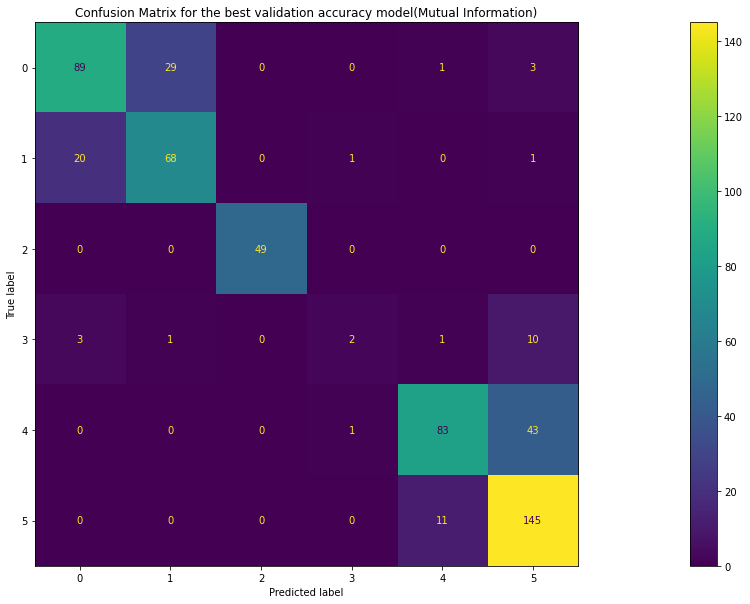

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(con_mat).plot()
plt.title(f'Confusion Matrix for the best validation accuracy model({best_methods})')
plt.show()

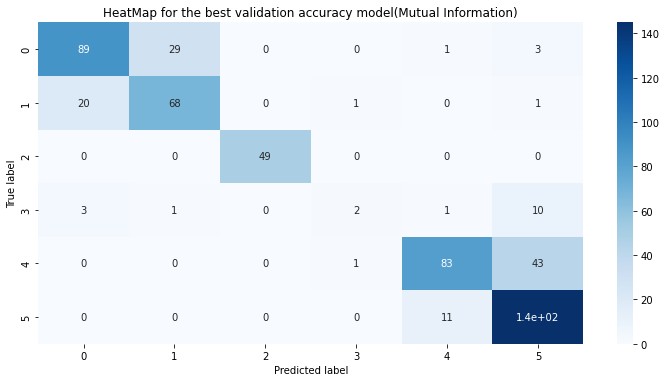

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'HeatMap for the best validation accuracy model({best_methods})')
plt.show()

In [ ]:
DF_AllValidationAccuracy["Validation Accuracy"].idxmax(axis = 0)

'Mutual Information'

In [ ]:

if(DF_AllValidationAccuracy["Validation Accuracy"].idxmax(axis = 0) == "PCA"):
  print("PCA is the best")
  X_trainSetBest = X_trainSet_AfterPCA_BybestComponent
  X_valSetBest = X_valSet_AfterPCA_BybestComponent
  X_testSetBest = X_testSet_AfterPCA_BybestComponent
elif(DF_AllValidationAccuracy["Validation Accuracy"].idxmax(axis = 0) == "ANOVA"):
  print("ANOVA is the best")
  X_trainSetBest = X_trainSet_After_ANOVA
  X_valSetBest= X_valSet_After_ANOVA 
  X_testSetBest= X_testSet_After_ANOVA
elif(DF_AllValidationAccuracy["Validation Accuracy"].idxmax(axis = 0) == "Mutual Information"):
  print("Mutual Information is the best")
  X_trainSetBest = X_trainSet_After_MutualInformation
  X_valSetBest = X_valSet_After_MutualInformation
  X_testSetBest = X_testSet_After_MutualInformation



Mutual Information is the best


In [ ]:
np.savetxt("X_trainSetBest.csv", X_trainSetBest, delimiter=",")
np.savetxt("X_valSetBest.csv", X_valSetBest, delimiter=",")
np.savetxt("X_testSetBest.csv", X_testSetBest, delimiter=",")

In [ ]:
np.savetxt("X_trainSetBest_copy.csv", X_trainSetBest_copy, delimiter=",")
np.savetxt("X_valSetBest_copy.csv", X_valSetBest_copy, delimiter=",")
np.savetxt("X_testSetBest_copy.csv", X_testSetBest_copy, delimiter=",")

In [ ]:
np.savetxt("y_trainSet.csv", y_trainSet, delimiter=",")
np.savetxt("y_valSet.csv", y_valSet, delimiter=",")
np.savetxt("y_testSet.csv", y_testSet, delimiter=",")
np.savetxt("y_trainSet_copy.csv", y_trainSet_copy, delimiter=",")
np.savetxt("y_valSet_copy.csv", y_valSet_copy, delimiter=",")
np.savetxt("y_testSet_copy.csv", y_testSet_copy, delimiter=",")